In [12]:
import numpy as np
import matplotlib.pyplot as plt

### Zad1

In [13]:
def generate_symmetric_matrix(n):
    matrix = np.random.uniform(-100, 100, (n, n))
    matrix = np.triu(matrix) + np.triu(matrix).T
    m = np.full((n, n), 1)
    np.fill_diagonal(m, 2)
    return matrix / m

In [14]:
mat = generate_symmetric_matrix(5)

In [15]:
print(mat)

[[-12.30668743 -77.94572322  42.4757247   89.969832    51.90911461]
 [-77.94572322  38.79886686  56.05393548 -51.78578377  76.94136327]
 [ 42.4757247   56.05393548  81.677908    -9.29836072  19.81033243]
 [ 89.969832   -51.78578377  -9.29836072  64.06922129 -50.27876984]
 [ 51.90911461  76.94136327  19.81033243 -50.27876984  28.67489043]]


In [150]:
eig_val, eig_vec = np.linalg.eig(mat)
print(eig_val)
print(eig_vec.T) # Transpozycja, żeby wektory własne były w kolejnych wierszach

[163.80657772 124.22978859  49.08681535 -44.38064572   0.8853744 ]
[[ 0.57006495 -0.07483078 -0.46102216  0.09720196  0.66890706]
 [-0.3538789  -0.15340272 -0.50175227 -0.77258875  0.05087842]
 [ 0.5788725  -0.46929686 -0.15762123 -0.11163197 -0.63824833]
 [ 0.1714202  -0.40562126  0.70279663 -0.43099123  0.35554179]
 [ 0.4304851   0.76557155  0.13013714 -0.44208965 -0.12729431]]


In [27]:
from time import perf_counter
def time_it(func, *args, **kwargs):
    t = perf_counter()
    func(*args, **kwargs)
    return perf_counter() - t

### Metoda potęgowa( liczy do ustalonej dokładności)

In [132]:
def power_method_with_eps(matrix, eps=0.00001):
    n = matrix.shape[0]
    x = np.full(n, 1)
    eig_v = 1
    last = 0
    while abs(eig_v - last) > eps:
        x = matrix.dot(x)
        last, eig_v = eig_v, np.max(np.abs(x))
        x /= eig_v

    return eig_v, x / np.linalg.norm(x)

### Metoda potęgowa( określona liczba iteracji)

In [133]:
def power_method_with_iter(matrix, k=1000):
    n = matrix.shape[0]
    x = np.full(n, 1)
    eig_v = 1
    for _ in range(k):
        x = matrix.dot(x)
        eig_v = np.max(np.abs(x))
        x /= eig_v

    return eig_v, x / np.linalg.norm(x)

### Obliczenie dominującej wartości własnej dla powyższej macierzy 5x5
Wychodzi dobrze, wektor własny znormalizowany ma inny zwrot niż ten który zwróciła funkcja biblioteczna, ale to bez znaczenia

In [134]:
power_method_with_eps(mat)

(469.5728178875646,
 array([-0.22951393,  0.31614698, -0.03646755, -0.11729026, -0.20122061,
        -0.34094087,  0.08802048, -0.07051557, -0.1518308 , -0.19752232,
         0.38366529,  0.16456894,  0.23637353,  0.2664111 ,  0.17126043,
         0.0966931 , -0.08036688,  0.13655764,  0.24777669, -0.41768447]))

### Testy czasowe
Oddzielne dla kryterium małej poprawki i określonej liczby iteracji

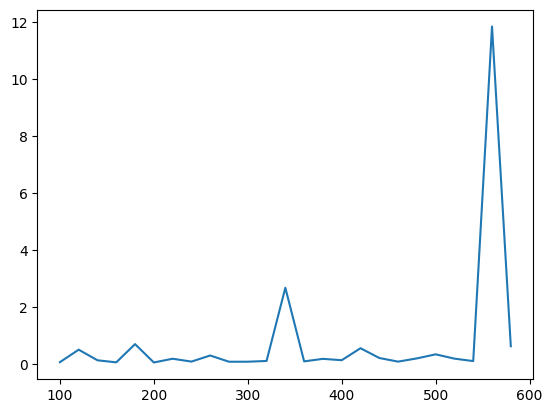

In [140]:
time = []
for i in range(100, 600, 20):
    test_matrix = generate_symmetric_matrix(i)
    time.append(time_it(power_method_with_eps, test_matrix))
plt.plot(list(range(100, 600, 20)), time)
plt.show()

W przypadku kryterium małej poprawki czas działania był bliżej nieokreślony

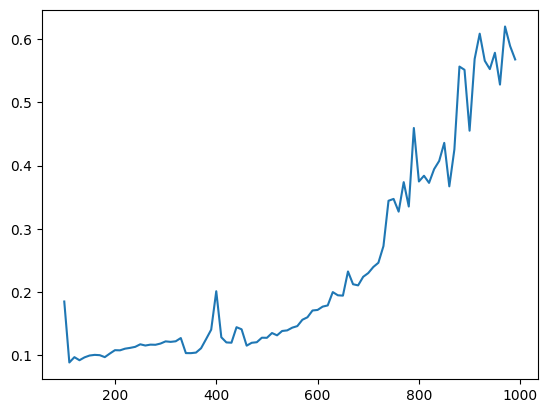

In [141]:
time = []
for i in range(100, 1000, 10):
    test_matrix = generate_symmetric_matrix(i)
    time.append(time_it(power_method_with_iter, test_matrix))
plt.plot(list(range(100, 1000, 10)), time)
plt.show()

Wynika z tego, że dla większych macierzy obliczenia trwają dłużej

## Zad2

In [151]:
def inverse_power_method(sigma, matrix):
    n = matrix.shape[0]
    matrix2 = np.linalg.inv(matrix - sigma*np.identity(n))
    eig_vector = power_method_with_iter(matrix2)[1]
    return eig_vector

In [152]:
print(inverse_power_method(45, mat))

[-0.5788725   0.46929686  0.15762123  0.11163197  0.63824833]


W originalnej macierzy najbliższą wartośćią własną dla 45 było 49 i odpowiedał jej wektor [ 0.5788725  -0.46929686 -0.15762123 -0.11163197 -0.63824833], oba są znormalizowane więc mają te same wartości bezwględne współrzędnych

## Zad3

In [144]:
def rayleigh(x, matrix):
    return (x @ matrix @ x.T) / (x @ x.T)

Na początku ustalam zakres wartości dla jakich będę wykonywał odwrotną metodę potęgową
Wiadomo, że metoda potęgowa zwraca wartość własną o największej wartości bezwzględnej
więc wystarczający zakres to -maks_eigenvalue do maks_eigenvalue


In [145]:
def find_eigenvalues(matrix):
    right_range = power_method_with_iter(matrix)[0]
    left_range = -right_range
    step = (right_range - left_range) / (matrix.shape[0] * 4)
    cur = left_range
    eigenvalues = []
    while cur < right_range:
        eigenvalues.append(rayleigh(inverse_power_method(cur, matrix), matrix))
        cur += step

    eps = pow(10, -5)
    eigenvalues.sort()
    remove_duplicates = [eigenvalues[0]]
    for x in eigenvalues[1:]:
        if abs(remove_duplicates[-1] - x) > eps:
            remove_duplicates.append(x)

    return remove_duplicates

In [148]:
mat = generate_symmetric_matrix(5)
found_eigenvalues = np.array(find_eigenvalues(mat))
real_eigenvalues = np.sort(np.linalg.eig(mat)[0])
print(found_eigenvalues)
print(real_eigenvalues)
print(np.allclose(found_eigenvalues, real_eigenvalues, pow(10, -5)))

[-44.38064572   0.8853744   49.08681535 124.22978859 163.80657772]
[-44.38064572   0.8853744   49.08681535 124.22978859 163.80657772]
True


In [147]:
mat = generate_symmetric_matrix(20)
found_eigenvalues = np.array(find_eigenvalues(mat))
real_eigenvalues = np.sort(np.linalg.eig(mat)[0])
print(found_eigenvalues)
print(real_eigenvalues)
print(np.allclose(found_eigenvalues, real_eigenvalues, pow(10, -5)))

[-487.25149066 -374.68788193 -330.01965212 -288.17723708 -240.89895963
 -218.95632947 -127.52929289  -96.90637842  -89.35301077    7.50616294
   34.25770232   52.73857808  125.57848999  154.74176518  167.64733445
  224.36626867  263.60827313  315.97891191  387.3788011   434.7365962 ]
[-487.25149066 -374.68788193 -330.01965212 -288.17723708 -240.89895963
 -218.95632947 -127.52929289  -96.90637842  -89.35301077    7.50616294
   34.25770232   52.73857808  125.57848999  154.74176518  167.64733445
  224.36626867  263.60827313  315.97891191  387.3788011   434.7365962 ]
True


Dla małych macierzy inverse power method pozwalało znaleźć  wszystkie wartości własne